In [4]:
install.packages("googledrive")
library(googledrive)
drive_auth()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

The googledrive package is requesting access to your Google account.
Enter '1' to start a new auth process or select a pre-authorized account.
1: Send me to the browser for a new auth process.
2: tasheikawilson137@gmail.com


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=9cd83356e2980e0b2274bf186062e893&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQVNWZ2kzSlEtTU9uSVRBUFpwMDlQdTRSclpCOU1qLUhMQnA1T1pYVUUzOFBKWll1RVQwNVNhQi1HZng0UEJmTC10bjJJdyIsInN0YXRlIjoiOWNkODMzNTZlMjk4MGUwYjIyNzRiZjE4NjA2MmU4OTMifQ==


In [2]:
library(dplyr)
library(nnet)
library(caret)

In [3]:
data <- read.csv('/content/loan_data_606.csv')
head(data,5)
data <- data %>% select(-id)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,⋯,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag
,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,⋯,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,68407277,3600,3600,3600,36,13.99,123.03,C,C4,10,⋯,3,76.9,0.0,0,0,178050,7746,2400,13734,N
2,68355089,24700,24700,24700,36,11.99,820.28,C,C1,10,⋯,2,97.4,7.7,0,0,314017,39475,79300,24667,N
3,66310712,35000,35000,35000,60,14.85,829.90,C,C5,10,⋯,1,100.0,0.0,0,0,381215,52226,62500,18000,N
4,68476807,10400,10400,10400,60,22.45,289.91,F,F1,3,⋯,4,96.6,60.0,0,0,439570,95768,20300,88097,N
5,68426831,11950,11950,11950,36,13.44,405.18,C,C3,4,⋯,0,100.0,100.0,0,0,16900,12798,9400,4000,N


In [22]:
str(data)


'data.frame':	886812 obs. of  76 variables:
 $ loan_amnt                 : int  3600 24700 35000 10400 11950 20000 20000 10000 8000 22400 ...
 $ funded_amnt               : int  3600 24700 35000 10400 11950 20000 20000 10000 8000 22400 ...
 $ funded_amnt_inv           : num  3600 24700 35000 10400 11950 ...
 $ term                      : int  36 36 60 60 36 36 36 36 36 60 ...
 $ int_rate                  : num  14 12 14.8 22.4 13.4 ...
 $ installment               : num  123 820 830 290 405 ...
 $ grade                     : chr  "C" "C" "C" "F" ...
 $ sub_grade                 : chr  "C4" "C1" "C5" "F1" ...
 $ emp_length                : int  10 10 10 3 4 10 10 6 10 6 ...
 $ home_ownership            : chr  "MORTGAGE" "MORTGAGE" "MORTGAGE" "MORTGAGE" ...
 $ annual_inc                : num  55000 65000 110000 104433 34000 ...
 $ pymnt_plan                : chr  "n" "n" "n" "n" ...
 $ dti                       : num  5.91 16.06 17.06 25.37 10.2 ...
 $ delinq_2yrs               : int  0 

In [1]:
system("apt-get install -y libcurl4-openssl-dev libssl-dev libxml2-dev")



In [1]:
install.packages("caret", repos="https://cran.rstudio.com/")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘ipred’, ‘recipes’




In [4]:
library(dplyr)
library(nnet)
library(caret)
#loan_data<-data%>%
  #mutate(across(where(is.character), as.factor))
loan_data<-data%>%
  mutate(across(where(is.character), as.factor))
loan_data <- data %>%
  mutate(across(c("sub_grade", "hardship_flag", "initial_list_status", "application_type", "home_ownership","pymnt_plan"),
                ~ as.numeric(as.factor(.))))
ind<-createDataPartition(loan_data$grade, p = .80, list = FALSE)
training<-loan_data[ind,]
testing<-loan_data[-ind,]

In [5]:
pca <-prcomp(training[,-7],center = TRUE,scale.=TRUE)

In [38]:
summary(pca)

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6    PC7
Standard deviation     3.3104 2.58603 2.39403 1.93306 1.81725 1.77640 1.5779
Proportion of Variance 0.1461 0.08917 0.07642 0.04982 0.04403 0.04207 0.0332
Cumulative Proportion  0.1461 0.23528 0.31170 0.36153 0.40556 0.44763 0.4808
                           PC8     PC9    PC10    PC11   PC12    PC13    PC14
Standard deviation     1.52395 1.47937 1.39656 1.37641 1.3583 1.28242 1.18863
Proportion of Variance 0.03097 0.02918 0.02601 0.02526 0.0246 0.02193 0.01884
Cumulative Proportion  0.51180 0.54098 0.56698 0.59224 0.6168 0.63877 0.65761
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     1.11285 1.10265 1.09014 1.05271 1.02986 1.01987 1.01676
Proportion of Variance 0.01651 0.01621 0.01585 0.01478 0.01414 0.01387 0.01378
Cumulative Proportion  0.67412 0.69033 0.70618 0.72095 0.73509 0.74896 0.76275
                          PC22    PC23

In [6]:
sdev <- pca$sdev
variance_proportion <- (sdev^2) / sum(sdev^2)
cumulative_variance <- cumsum(variance_proportion)
num_components <- which(cumulative_variance >= 0.95)[1]
cat("Number of PCs to explain at least 95% variance:", num_components, "\n")

training_pred<-predict(pca,training[-7])[, 1:41]
training_pred<-data.frame(training_pred,training[7])

testing_pred<-predict(pca,testing[-7])[, 1:41]
testing_pred<-data.frame(testing_pred,testing[7])

Number of PCs to explain at least 95% variance: 41 


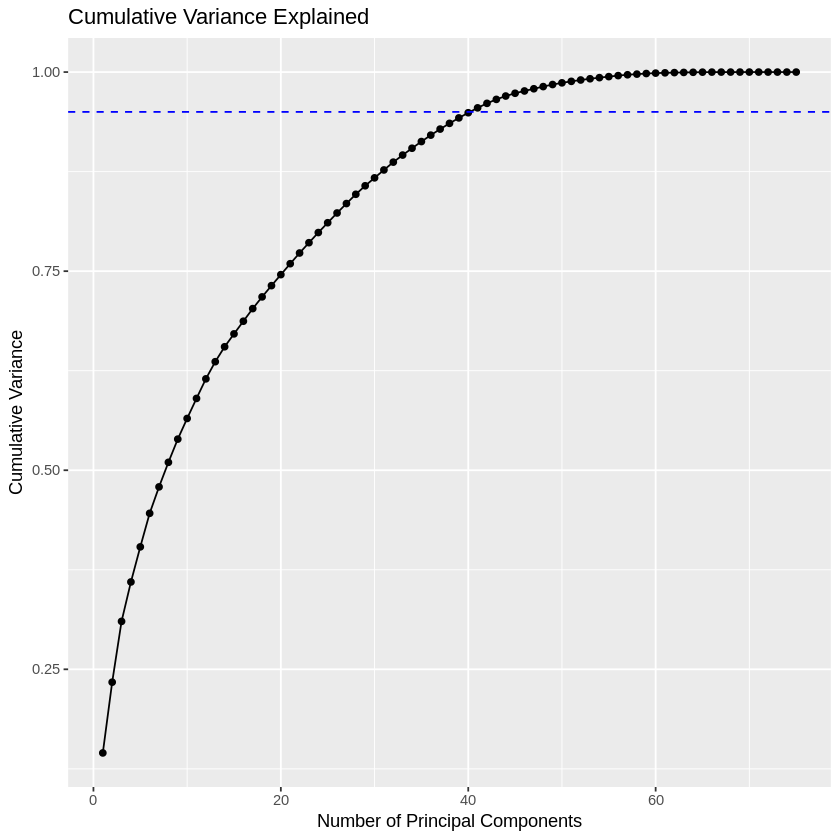

In [28]:
library(ggplot2)
ggplot(data.frame(PC = 1:length(cumulative_variance), Variance = cumulative_variance), aes(x = PC, y = Variance)) +
  geom_line() +
  geom_point() +
  geom_hline(yintercept = 0.95, linetype = "dashed", color = "blue") +
  labs(title = "Cumulative Variance Explained", x = "Number of Principal Components", y = "Cumulative Variance")


In [18]:
training_pred$grade <- as.factor(training_pred$grade)
training_pred$grade<-relevel(training_pred$grade,ref = "A")
dim((training_pred))

[1] 709453     42

In [19]:
train_control <- trainControl(method = "cv", number = 3)
model <- train(grade ~ ., data = training_pred, method = "multinom", trControl = train_control)

# weights:  301 (252 variable)
initial  value 920355.177284 
iter  10 value 626885.222137
iter  20 value 535537.699456
iter  30 value 492106.022169
iter  40 value 475999.964035
iter  50 value 471862.485842
iter  60 value 470882.797747
iter  70 value 468555.731186
iter  80 value 442447.915918
iter  90 value 369852.351075
iter 100 value 357697.486077
final  value 357697.486077 
stopped after 100 iterations
# weights:  301 (252 variable)
initial  value 920355.177284 
iter  10 value 626896.745187
iter  20 value 535563.401783
iter  30 value 492160.559013
iter  40 value 476082.164409
iter  50 value 471954.511119
iter  60 value 470977.336174
iter  70 value 468646.300551
iter  80 value 442169.028884
iter  90 value 372612.965982
iter 100 value 364918.531487
final  value 364918.531487 
stopped after 100 iterations
# weights:  301 (252 variable)
initial  value 920355.177284 
iter  10 value 626885.233660
iter  20 value 535537.725160
iter  30 value 492106.076721
iter  40 value 476000.046274
iter  5

In [22]:
testing_pred$grade <- as.factor(testing_pred$grade)
testing_pred$grade<-relevel(testing_pred$grade,ref = "A")
test_pred <- predict(model,newdata=testing_pred)
conf_matrix=confusionMatrix(test_pred,testing_pred$grade)
conf_matrix

Confusion Matrix and Statistics

          Reference
Prediction     A     B     C     D     E     F     G
         A 34617  1824     3     0     0     0     0
         B  2428 44591  4040     7     0     0     0
         C     3  4368 46689 12443   673    12     1
         D     0     0   322 10030  7596  1432   244
         E     0     0   100   968  2314  1664   798
         F     0     0    30    31    16     1     0
         G     4    19    43    23    17     6     2

Overall Statistics
                                          
               Accuracy : 0.7795          
                 95% CI : (0.7775, 0.7814)
    No Information Rate : 0.2888          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7073          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E  Class: F
Sensitivity      

In [27]:
table1<-table(test_pred,testing_pred$grade)
table1
#(1-sum(diag(table1))/sum(table1))*100
cat("Misclassification rate:", round((1-sum(diag(table1))/sum(table1))*100,3), "%")

         
test_pred     A     B     C     D     E     F     G
        A 34617  1824     3     0     0     0     0
        B  2428 44591  4040     7     0     0     0
        C     3  4368 46689 12443   673    12     1
        D     0     0   322 10030  7596  1432   244
        E     0     0   100   968  2314  1664   798
        F     0     0    30    31    16     1     0
        G     4    19    43    23    17     6     2

Misclassification rate: 22.054 %

In [29]:
conf_matrix$byClass

,Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy
Class: A,0.9342815503,0.9869786,0.94986829,0.9827201,0.94986829,0.9342815503,0.9420104495,0.208909613,1.951804e-01,0.2054815374,0.9606301
Class: B,0.8777410338,0.9488373,0.87320331,0.9508207,0.87320331,0.8777410338,0.8754662897,0.286435986,2.514166e-01,0.2879244921,0.9132892
Class: C,0.9114139028,0.8612565,0.72736762,0.9599010,0.72736762,0.9114139028,0.8090559368,0.288832255,2.632457e-01,0.3619156626,0.8863352
Class: D,0.4267721896,0.9376434,0.51110885,0.9145909,0.51110885,0.4267721896,0.4651486342,0.132510896,5.655197e-02,0.1106456396,0.6822078
Class: E,0.2179728711,0.9788297,0.39596167,0.9515961,0.39596167,0.2179728711,0.2811664642,0.059855998,1.304698e-02,0.0329501181,0.5984013
Class: F,0.0003210273,0.9995581,0.01282051,0.9824347,0.01282051,0.0003210273,0.0006263702,0.017563247,5.638282e-06,0.0004397860,0.4999396
Class: G,0.0019138756,0.9993648,0.01754386,0.9941155,0.01754386,0.0019138756,0.0034512511,0.005892004,1.127656e-05,0.0006427641,0.5006393


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



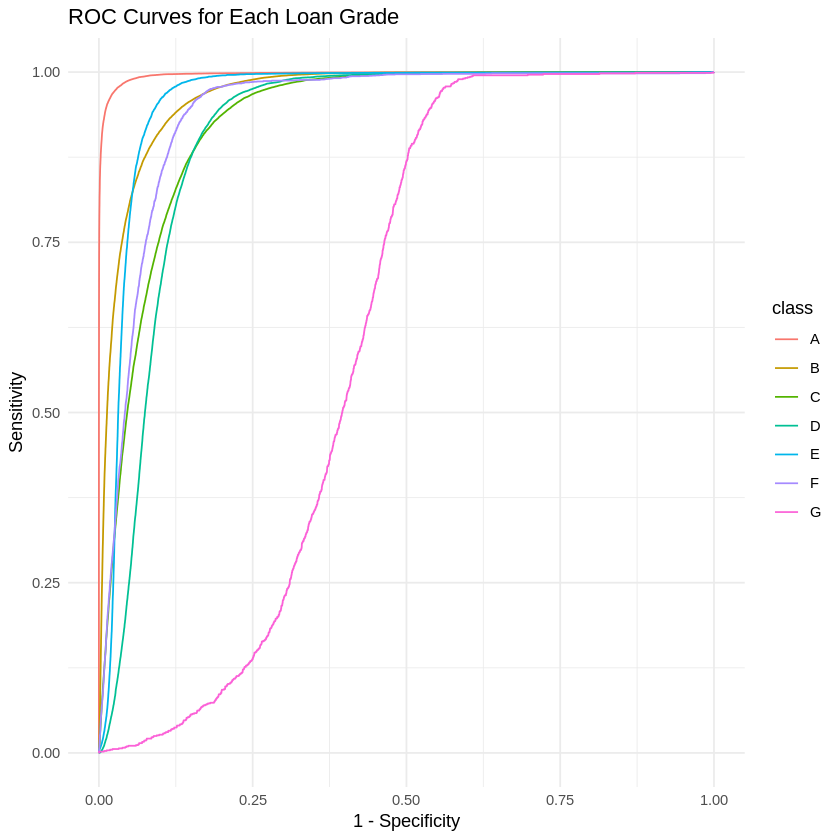

In [34]:
#install.packages("pROC")
library(pROC)
library(ggplot2)



# Get predicted probabilities
test_probs <- predict(model, newdata = testing_pred, type = "prob")

# Initialize an empty list to store ROC curves
roc_data <- list()

# Compute ROC for each class
for (class in levels(testing_pred$grade)) {
  roc_data[[class]] <- roc(ifelse(testing_pred$grade == class, 1, 0), test_probs[, class])
}

# Convert ROC data into a format suitable for ggplot2
roc_df <- do.call(rbind, lapply(names(roc_data), function(class) {
  data.frame(
    specificity = rev(roc_data[[class]]$specificities),  # Reverse order for proper plotting
    sensitivity = rev(roc_data[[class]]$sensitivities),
    class = class
  )
}))

# Plot the ROC curves for all 7 classes
ggplot(roc_df, aes(x = 1 - specificity, y = sensitivity, color = class)) +
  geom_line() +
  labs(title = "ROC Curves for Each Loan Grade",
       x = "1 - Specificity",
       y = "Sensitivity") +
  theme_minimal()



Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



  Class       AUC
1     A 0.9968527
2     B 0.9666306
3     C 0.9293156
4     D 0.9107708
5     E 0.9597828
6     F 0.9418459
7     G 0.6204624


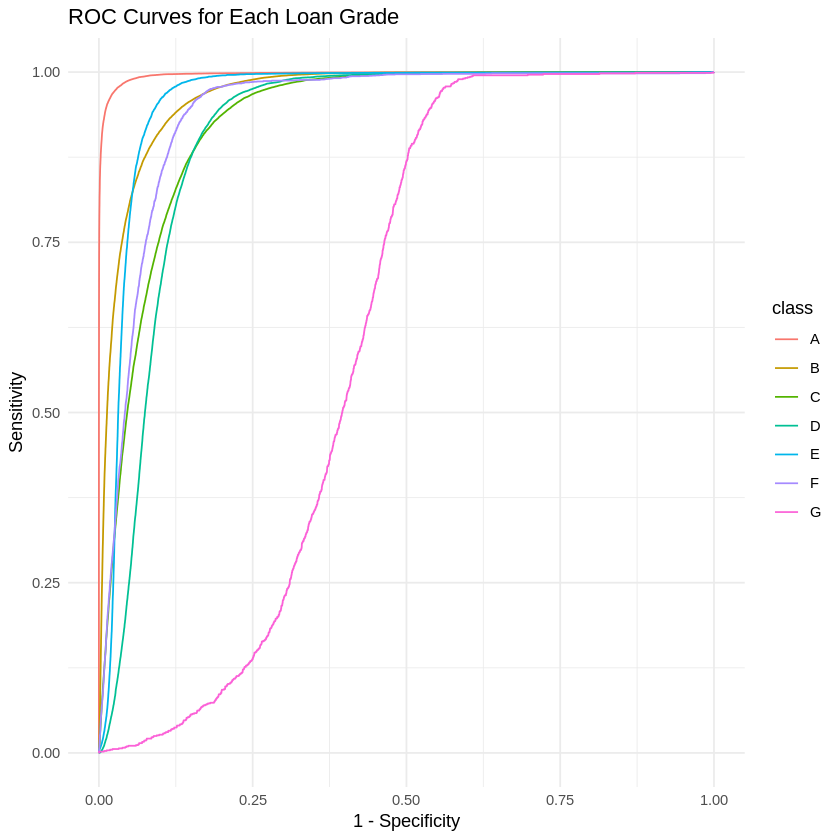

In [35]:
library(pROC)
library(ggplot2)

# Get predicted probabilities
test_probs <- predict(model, newdata = testing_pred, type = "prob")

# Initialize an empty list to store ROC curves and AUC values
roc_data <- list()
auc_values <- data.frame(Class = character(), AUC = numeric(), stringsAsFactors = FALSE)

# Compute ROC and AUC for each class
for (class in levels(testing_pred$grade)) {
  roc_curve <- roc(ifelse(testing_pred$grade == class, 1, 0), test_probs[, class])
  roc_data[[class]] <- roc_curve

  # Store AUC value
  auc_values <- rbind(auc_values, data.frame(Class = class, AUC = auc(roc_curve)))
}

# Print AUC values for each class
print(auc_values)

# Convert ROC data into a format suitable for ggplot2
roc_df <- do.call(rbind, lapply(names(roc_data), function(class) {
  data.frame(
    specificity = rev(roc_data[[class]]$specificities),  # Reverse order for proper plotting
    sensitivity = rev(roc_data[[class]]$sensitivities),
    class = class
  )
}))

# Plot the ROC curves for all 7 classes
ggplot(roc_df, aes(x = 1 - specificity, y = sensitivity, color = class)) +
  geom_line() +
  labs(title = "ROC Curves for Each Loan Grade",
       x = "1 - Specificity",
       y = "Sensitivity") +
  theme_minimal()


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



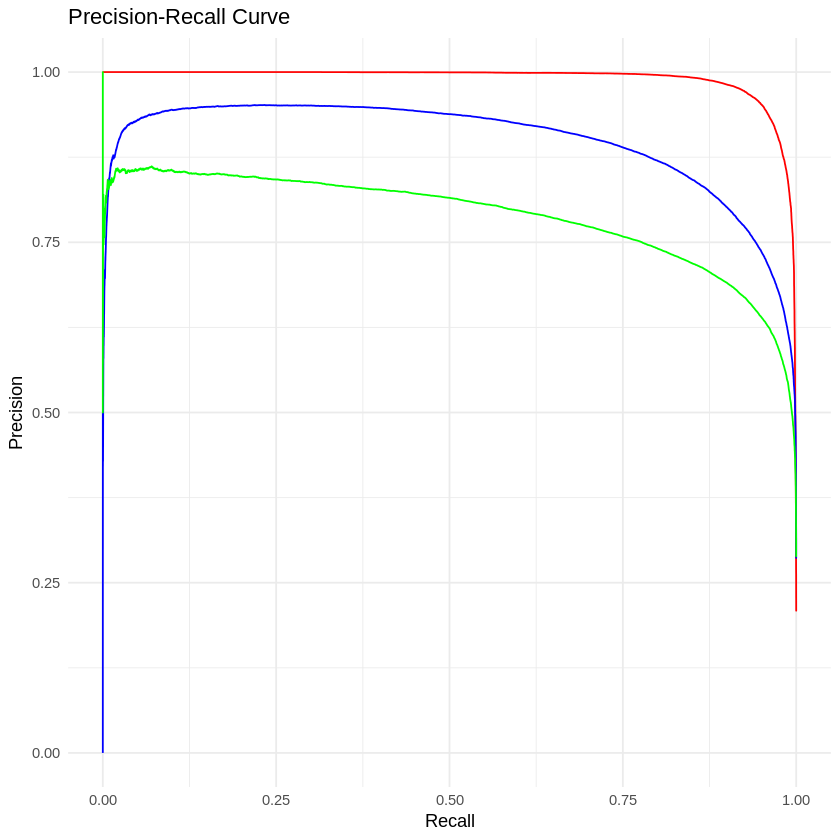

In [36]:
install.packages("PRROC")
library(PRROC)

# Generate precision-recall curves
pr_data <- list()
for (class in levels(testing_pred$grade)) {
  pr_data[[class]] <- pr.curve(scores.class0 = test_probs[, class],
                               weights.class0 = ifelse(testing_pred$grade == class, 1, 0),
                               curve = TRUE)
}

# Plot PR curves
ggplot() +
  geom_line(data = data.frame(pr_data[[1]]$curve), aes(x = X1, y = X2), color = "red") +
  geom_line(data = data.frame(pr_data[[2]]$curve), aes(x = X1, y = X2), color = "blue") +
  geom_line(data = data.frame(pr_data[[3]]$curve), aes(x = X1, y = X2), color = "green") +
  labs(title = "Precision-Recall Curve", x = "Recall", y = "Precision") +
  theme_minimal()


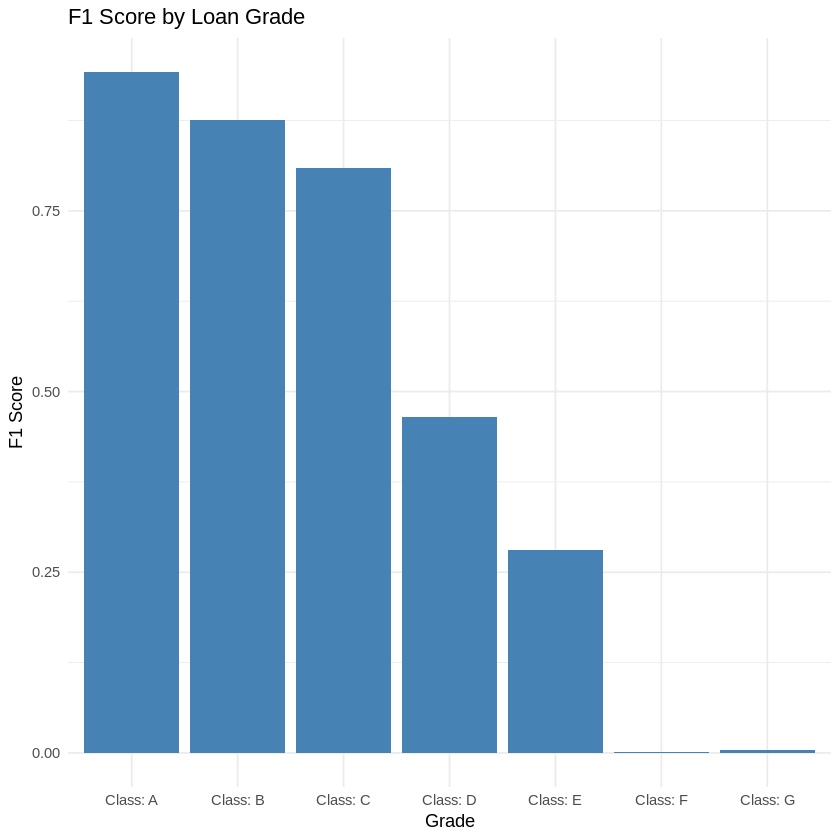

In [37]:
library(ggplot2)
f1_scores <- as.data.frame(conf_matrix$byClass)
f1_scores$Grade <- rownames(f1_scores)

ggplot(f1_scores, aes(x = Grade, y = F1)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "F1 Score by Loan Grade", x = "Grade", y = "F1 Score") +
  theme_minimal()


multinom variable importance

  only 20 most important variables shown (out of 41)

     Overall
PC14  100.00
PC3    73.16
PC38   69.11
PC23   49.18
PC6    45.30
PC22   40.29
PC10   34.96
PC21   32.29
PC40   32.10
PC19   30.29
PC27   29.82
PC41   27.33
PC16   22.61
PC17   18.45
PC13   18.01
PC4    17.79
PC31   17.70
PC30   14.51
PC37   14.31
PC7    13.06


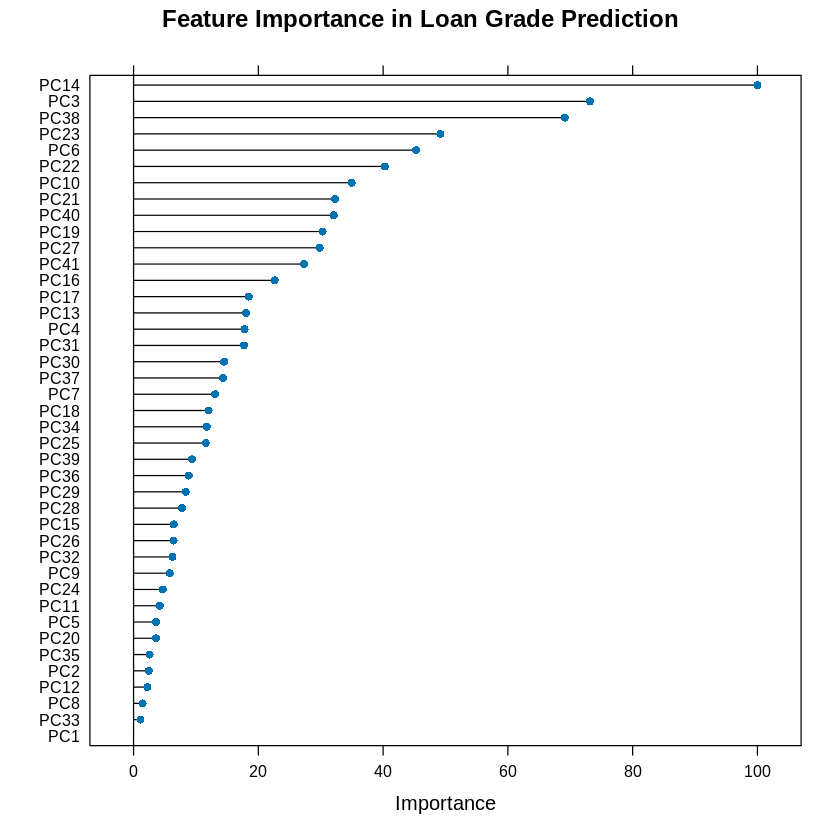

In [39]:
importance <- varImp(model)
print(importance)
plot(importance, main = "Feature Importance in Loan Grade Prediction")
